# Ciclo08: Neural Network MLP

# 00 - Imports

In [9]:
import pandas as pd
import random
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from sklearn import metrics as m
from scikitplot import metrics as mt
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder

from keras import models as ml
from keras import layers as l

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
import pickle

warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML(""))

In [6]:
path_data = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/data/'
path_model = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/models/'
path_transformation = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/transformation_data/'

In [12]:
from sklearn import datasets as d

In [29]:
X, y = d.make_circles( n_samples=10000, noise=0.1, factor=0.2)

<AxesSubplot:>

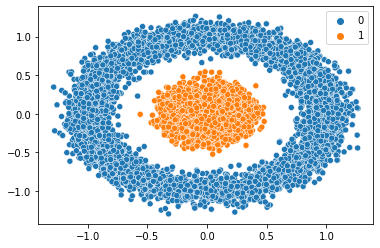

In [32]:
sns.scatterplot( X[:,0], X[:,1], hue=y)

## Aplicação Rede Neural - Aula 12 - Teoria no Cadernos

## MLP Training

In [52]:

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
# Split training into train and test dataset
X_train, x_val, y_train , y_val = train_test_split(X, y, test_size=0.2)

# Multi-Layer Perceptron
# Model Definition (Layers, neurons)
model = Sequential()

model.add( Dense( 2, input_dim= X_train.shape[1], activation='relu' )) # Input layer, hidden layer (Neste caso Utilizando 2 Neuronios )
model.add( Dense(1, activation='sigmoid')) #Output layer

# Model compile (Loss, optimizer, metrics)
opt = SGD( lr= 0.01, momentum= 0.8)
model.compile( loss= 'mean_squared_error', optimizer= opt, metrics=['accuracy'])

# Model Training (Train, test, epocas)
history = model.fit(X_train, y_train, validation_data=(x_val, y_val), epochs=4000, verbose=True)



Epoch 1/4000


2022-12-19 19:15:32.840926: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-12-19 19:15:32.840946: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: wellington-IPMH510G
2022-12-19 19:15:32.840950: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: wellington-IPMH510G
2022-12-19 19:15:32.841062: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.85.2
2022-12-19 19:15:32.841076: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.85.2
2022-12-19 19:15:32.841080: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.85.2
2022-12-19 19:15:32.841325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in p

25/25 [==============================] - 0s 5ms/step - loss: 0.2248 - accuracy: 0.5425 - val_loss: 0.2238 - val_accuracy: 0.6250
Epoch 2/4000
25/25 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.7287 - val_loss: 0.2210 - val_accuracy: 0.7200
Epoch 3/4000
25/25 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.7700 - val_loss: 0.2188 - val_accuracy: 0.7450
Epoch 4/4000
25/25 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.7887 - val_loss: 0.2167 - val_accuracy: 0.7550
Epoch 5/4000
25/25 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.7987 - val_loss: 0.2148 - val_accuracy: 0.7700
Epoch 6/4000
25/25 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.8037 - val_loss: 0.2129 - val_accuracy: 0.7600
Epoch 7/4000
25/25 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.8100 - val_loss: 0.2110 - val_accuracy: 0.7850
Epoch 8/4000
25/25 

Training ACC: 0.8849999904632568 - Validation ACC: 0.8899999856948853


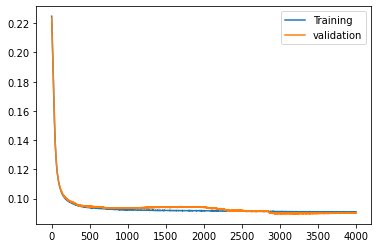

In [24]:
# Model accuracy
_, acc_train = model.evaluate(X_train, y_train, verbose=0)
_, acc_val = model.evaluate(x_val, y_val, verbose=0)

print( 'Training ACC: {} - Validation ACC: {}'.format(acc_train, acc_val))

# Learning Curve
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

### Utilizando mais Neuronios

Verificar a diferença entre o modelo anterior

In [30]:
# Split training into train and test dataset
X_train, x_val, y_train , y_val = train_test_split(X, y, test_size=0.2)

# Multi-Layer Perceptron
# Model Definition (Layers, neurons)
model = Sequential()

model.add( Dense( 4, input_dim= X_train.shape[1], activation='relu' )) # Input layer, hidden layer (Neste caso Utilizando 3 Neuronios )

model.add( Dense(1, activation='sigmoid')) #Output layer

# Model compile (Loss, optimizer, metrics)
opt = SGD( lr= 0.01, momentum= 0.8)
model.compile( loss= 'mean_squared_error', optimizer= opt, metrics=['accuracy'])

# Model Training (Train, test, epocas)
history = model.fit(X_train, y_train, validation_data=(x_val, y_val), epochs=1000, verbose=True)

Epoch 1/1000
250/250 [==============================] - 0s 959us/step - loss: 0.2736 - accuracy: 0.4622 - val_loss: 0.2419 - val_accuracy: 0.5125
Epoch 2/1000
250/250 [==============================] - 0s 647us/step - loss: 0.2282 - accuracy: 0.5964 - val_loss: 0.2190 - val_accuracy: 0.6615
Epoch 3/1000
250/250 [==============================] - 0s 639us/step - loss: 0.2169 - accuracy: 0.6525 - val_loss: 0.2118 - val_accuracy: 0.6810
Epoch 4/1000
250/250 [==============================] - 0s 634us/step - loss: 0.2116 - accuracy: 0.6678 - val_loss: 0.2071 - val_accuracy: 0.6825
Epoch 5/1000
250/250 [==============================] - 0s 648us/step - loss: 0.2080 - accuracy: 0.6724 - val_loss: 0.2041 - val_accuracy: 0.6830
Epoch 6/1000
250/250 [==============================] - 0s 641us/step - loss: 0.2056 - accuracy: 0.6719 - val_loss: 0.2018 - val_accuracy: 0.6900
Epoch 7/1000
250/250 [==============================] - 0s 637us/step - loss: 0.2039 - accuracy: 0.6745 - val_loss: 0.2002 -

Training ACC: 0.6840000152587891 - Validation ACC: 0.6930000185966492


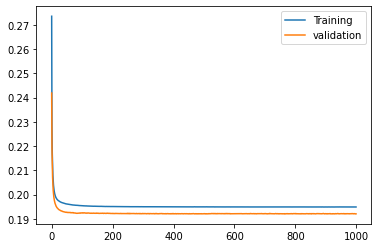

In [31]:
# Model accuracy
_, acc_train = model.evaluate(X_train, y_train, verbose=0)
_, acc_val = model.evaluate(x_val, y_val, verbose=0)

print( 'Training ACC: {} - Validation ACC: {}'.format(acc_train, acc_val))

# Learning Curve
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

## Overfitting the Model

In [33]:
X, y = d.make_classification( n_samples= 1000, n_features= 20, n_classes= 2)

In [34]:
# Split training into train and test dataset
X_train, x_val, y_train , y_val = train_test_split(X, y, test_size=0.2)

# Multi-Layer Perceptron
# Model Definition (Layers, neurons)
model = Sequential()

model.add( Dense( 10, input_dim= X_train.shape[1], activation='relu' )) # Input layer, hidden layer (Neste caso Utilizando 3 Neuronios )

model.add( Dense(1, activation='sigmoid')) #Output layer

# Model compile (Loss, optimizer, metrics)
opt = SGD( lr= 0.01, momentum= 0.8)
model.compile( loss= 'mean_squared_error', optimizer= opt, metrics=['accuracy'])

# Model Training (Train, test, epocas)
history = model.fit(X_train, y_train, validation_data=(x_val, y_val), epochs=1000, verbose=True)

Epoch 1/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2419 - accuracy: 0.5800 - val_loss: 0.2356 - val_accuracy: 0.6050
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.7000 - val_loss: 0.1982 - val_accuracy: 0.7050
Epoch 3/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1640 - accuracy: 0.7850 - val_loss: 0.1773 - val_accuracy: 0.7700
Epoch 4/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.8350 - val_loss: 0.1616 - val_accuracy: 0.7950
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.8687 - val_loss: 0.1497 - val_accuracy: 0.8000
Epoch 6/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.8825 - val_loss: 0.1406 - val_accuracy: 0.8250
Epoch 7/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1019 - accuracy: 0.8975 - val_loss: 0.1334 - val_accuracy: 0.8450
Epoch 

Training ACC: 0.9862499833106995 - Validation ACC: 0.8999999761581421


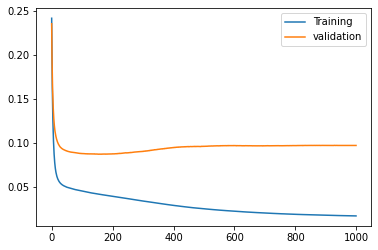

In [35]:
# Model accuracy
_, acc_train = model.evaluate(X_train, y_train, verbose=0)
_, acc_val = model.evaluate(x_val, y_val, verbose=0)

print( 'Training ACC: {} - Validation ACC: {}'.format(acc_train, acc_val))

# Learning Curve
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

## Avoiding Overfitting

In [36]:
# Dados 
# - Coletar mais dados (Aumentar o numero de exemplos de treino)
# - Reduzir a dimensionalidade (Feature Selection)
# - Remover variáveis linearmente dependentes ou alto correlacionadas
# - Limpeza de dados

#Modelos
# - Diminuir a complexidade do modelo (Redes Neurais diminuir a quantidade de Neuronios, Arvores diminuir a profundidade delas, SVM diminuir a quantidade de sob espaço que ela cria, limitando, KNN Não Overfita pq não tem parametro para estimar.)
# - Diminuir o numero de parametro e para redes neurais é limitar o treinamento. 

In [37]:
X, y = d.make_classification( n_samples= 1000, n_features= 20, n_classes= 2)

Training ACC: 0.9962499737739563 - Validation ACC: 0.9549999833106995


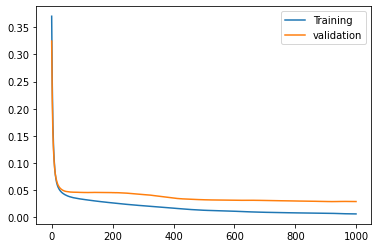

In [78]:
# Split training into train and test dataset
X_train, x_val, y_train , y_val = train_test_split(X, y, test_size=0.2)

# Multi-Layer Perceptron
# Model Definition (Layers, neurons)
model = Sequential()

model.add( Dense( 10, input_dim= X_train.shape[1], activation='relu' )) # Input layer, hidden layer (Neste caso Utilizando 3 Neuronios )

model.add( Dense(1, activation='sigmoid')) #Output layer

# Model compile (Loss, optimizer, metrics)
opt = SGD( lr= 0.01, momentum= 0.8)
model.compile( loss= 'mean_squared_error', optimizer= opt, metrics=['accuracy'])

# Model Training (Train, test, epocas)
es = EarlyStopping( monitor= 'val_loss', mode='auto', baseline=0.05 ,patience= 100) # Função que monitoria as epocas para parar de treinar no momento que o resultado começar a piorar.

mc = ModelCheckpoint( "best_model.h5" , monitor= 'val_accuracy', mode= 'max', save_best_only= True) #Função abaixo monitora o modelo e salva ele conforme configuração aplicada na função, dessa forma vocne consegue salvar as configurações do modelo por exemplo quando ele atingir a max da accuracy.

history = model.fit(X_train, y_train, validation_data=(x_val, y_val), epochs=1000, verbose=0, callbacks=[es, mc])

# Model accuracy
_, acc_train = model.evaluate(X_train, y_train, verbose=0)
_, acc_val = model.evaluate(x_val, y_val, verbose=0)

print( 'Training ACC: {} - Validation ACC: {}'.format(acc_train, acc_val))

# Learning Curve
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

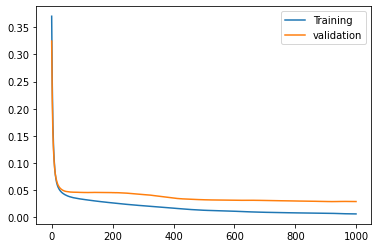

In [79]:
#Load Model (Carregar o modelo que foi salvo no ModelCheckpoint)
best_model = load_model("best_model.h5")

# Model accuracy
_, acc_train = best_model.evaluate(X_train, y_train, verbose=0)
_, acc_val = best_model.evaluate(x_val, y_val, verbose=0)

#print( 'Training ACC: {} - Validation ACC: {}'.format(acc_train, acc_val))

# Learning Curve
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

## Redes Neurais - Aplicação em Regressão e Séries Temporais - Aula 13 - Teoria no cadernos


In [1]:
from sklearn import datasets as d

In [15]:
X, y = d.make_regression( n_samples = 1000, n_features=20, noise=0.1)


# Split training into train and test dataset
X_train, x_val, y_train , y_val = train_test_split(X, y, test_size=0.2)

In [16]:
# Model Definition (Layers, neurons)
model = Sequential()

model.add( Dense( 4, input_dim= X_train.shape[1], activation='relu' )) # Input layer, hidden layer (Neste caso Utilizando 3 Neuronios )

model.add( Dense(1, activation='linear')) #Output layer (Camada de Saida, muda para regression)

# Model compile (Loss, optimizer, metrics) Função loss de Erro que faz os updates dos pesos da rede, (compara valor Real - Predito)

opt = SGD( lr= 0.01, momentum= 0.8) #Gradiente descendente, lr é o passo que vai andar o aprendizado do modelo, momentum ajuda a não cair no minimo local.

model.compile( loss= 'mse', optimizer= opt, metrics=['mse']) #Função Metrics calcula a performance do modelo em relação aos dados de validação.

# Model Training (Train, test, epocas)

#es = EarlyStopping( monitor= 'val_loss', mode='auto', baseline=0.05 ,patience= 100) # Função que monitoria as epocas para parar de treinar no momento que o resultado começar a piorar.
#mc = ModelCheckpoint( "best_model.h5" , monitor= 'val_accuracy', mode= 'max', save_best_only= True) #Função abaixo monitora o modelo e salva ele conforme configuração aplicada na função, dessa forma vocne consegue salvar as configurações do modelo por exemplo quando ele atingir a max da accuracy.

history = model.fit(X_train, y_train, validation_data=(x_val, y_val), epochs=100, verbose=0)

# Model accuracy
_, mse_train = model.evaluate(X_train, y_train, verbose=0)
_, mse_val = model.evaluate(x_val, y_val, verbose=0)

print( 'Training MSE: {} - Validation MSE: {}'.format(mse_train, mse_val))

Training MSE: nan - Validation MSE: nan


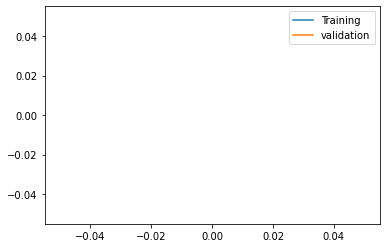

In [17]:
# Learning Curve
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()